In [27]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [3]:
# Read in the dataset

df = pd.read_csv('diabetes_dataset.csv')
df.head()

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   year                  100000 non-null  int64  
 1   gender                100000 non-null  object 
 2   age                   100000 non-null  float64
 3   location              100000 non-null  object 
 4   race:AfricanAmerican  100000 non-null  int64  
 5   race:Asian            100000 non-null  int64  
 6   race:Caucasian        100000 non-null  int64  
 7   race:Hispanic         100000 non-null  int64  
 8   race:Other            100000 non-null  int64  
 9   hypertension          100000 non-null  int64  
 10  heart_disease         100000 non-null  int64  
 11  smoking_history       100000 non-null  object 
 12  bmi                   100000 non-null  float64
 13  hbA1c_level           100000 non-null  float64
 14  blood_glucose_level   100000 non-null  int64  
 15  d

Examining the data:
- 3 categorical columns - 'gender', 'location', 'smoking-history'
- no na values
- our target variable 'diabetes' is already an int
- 0 = does not have diabetes, 1 = does


In [5]:
# Create a baseline RandomForest Model

ohe = OneHotEncoder(drop='first', dtype='int')
model = RandomForestClassifier(random_state=42)


In [6]:
# Drop columns that won't be useful
# year - year the data was collected
# location

dropped_df = df.drop(columns=['location', 'year'])

In [7]:
# Get our target feature

X = dropped_df.drop(columns='diabetes')
y = df['diabetes']

# Split into our test and train sets

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=27)

In [8]:
# Encode 'gender' and 'smoking_history'

# Define the columns to encode
columns_to_encode = ['gender', 'smoking_history']

# Create the ColumnTransformer
ct = ColumnTransformer([
    ('encoder', OneHotEncoder(handle_unknown='ignore'), columns_to_encode)
], remainder='passthrough')

# Fit on the training data and transform both training and test data
X_train_encoded = ct.fit_transform(X_train)
X_test_encoded = ct.transform(X_test)

In [9]:
# Fit our model

model.fit(X_train_encoded, y_train)

RandomForestClassifier(random_state=42)

In [10]:
# Make predictions

predictions = model.predict(X_test_encoded)

In [11]:
# Score the baseline model

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

# Print detailed classification report
print(classification_report(y_test, predictions))

# Print confusion matrix
print(confusion_matrix(y_test, predictions))

Accuracy: 0.96872
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     22839
           1       0.96      0.66      0.79      2161

    accuracy                           0.97     25000
   macro avg       0.97      0.83      0.88     25000
weighted avg       0.97      0.97      0.97     25000

[[22784    55]
 [  727  1434]]


Evaluation - Good accuracy score without any cleaning. Lower performance on the minority class.

In [36]:
# Exploration and Cleanup

print(df.columns)

# Rename columns 
new_names = {
    'year': 'Year',
    'gender': 'Gender',
    'age' : 'Age',
    'location' :'Location',
    'race:AfricanAmerican' : "Race : African American",
    'race:Asian' : 'Race : Asian',
    'race:Caucasian' : 'Race : Caucasian',
    'race:Hispanic' : 'Race : Hispanic',
    'race:Other' : 'Race : Other',
    'hypertension' : 'Hypertension',
    'heart_disease' : 'Heart Disease',
    'smoking_history' : 'Smoking History',
    'bmi' : 'BMI',
    'hbA1c_level' : 'HbA1c Level',
    'blood_glucose_level' : 'Blood Glucose Level',
    'diabetes' : 'Diabetes'
}
df = df.rename(columns=new_names)

df.columns

Index(['Year', 'Gender', 'Age', 'Location', 'Race : African American',
       'Race : Asian', 'Race : Caucasian', 'Race : Hispanic', 'Race : Other',
       'Hypertension', 'Heart Disease', 'Smoking History', 'BMI',
       'hbA1c Level', 'Blood Glucose Level', 'Diabetes'],
      dtype='object')


Index(['Year', 'Gender', 'Age', 'Location', 'Race : African American',
       'Race : Asian', 'Race : Caucasian', 'Race : Hispanic', 'Race : Other',
       'Hypertension', 'Heart Disease', 'Smoking History', 'BMI',
       'hbA1c Level', 'Blood Glucose Level', 'Diabetes'],
      dtype='object')

In [18]:
# Checking for class imbalance for target 

df['Diabetes'].value_counts(normalize=True)

Diabetes
0    0.915
1    0.085
Name: proportion, dtype: float64

- Major imbalance, apply SMOTE?

In [19]:
# Examine catgoric columns

print(df['Smoking History'].value_counts())

print(df['Gender'].value_counts(normalize=True))

df['Gender'].value_counts()


Smoking History
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64
Gender
Female    0.58552
Male      0.41430
Other     0.00018
Name: proportion, dtype: float64


Gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

- smoking history has a "No Info" category
- whats the difference between former and not current?
- what is 'ever'?
- maybe combine some of the categories

- dataset contains more females than males
- gender has an 'Other' category with 18 entries - drop? or change to M/F?

In [20]:
# Examine numeric columns
print(df.select_dtypes(include=['int64', 'float64']).columns)

Index(['Year', 'Age', 'Race : African American', 'Race : Asian',
       'Race : Caucasian', 'Race : Hispanic', 'Race : Other', 'Hypertension',
       'Heart Disease', 'BMI', 'hbA1c Level', 'Blood Glucose Level',
       'Diabetes'],
      dtype='object')


- the 'Race' categories are already 'encoded' although there are only 5 categories

In [24]:
# Examine the either/or columns

print(df['Hypertension'].value_counts(normalize=True))

print(df['Heart Disease'].value_counts(normalize=True))

Hypertension
0    0.92515
1    0.07485
Name: proportion, dtype: float64
Heart Disease
0    0.96058
1    0.03942
Name: proportion, dtype: float64


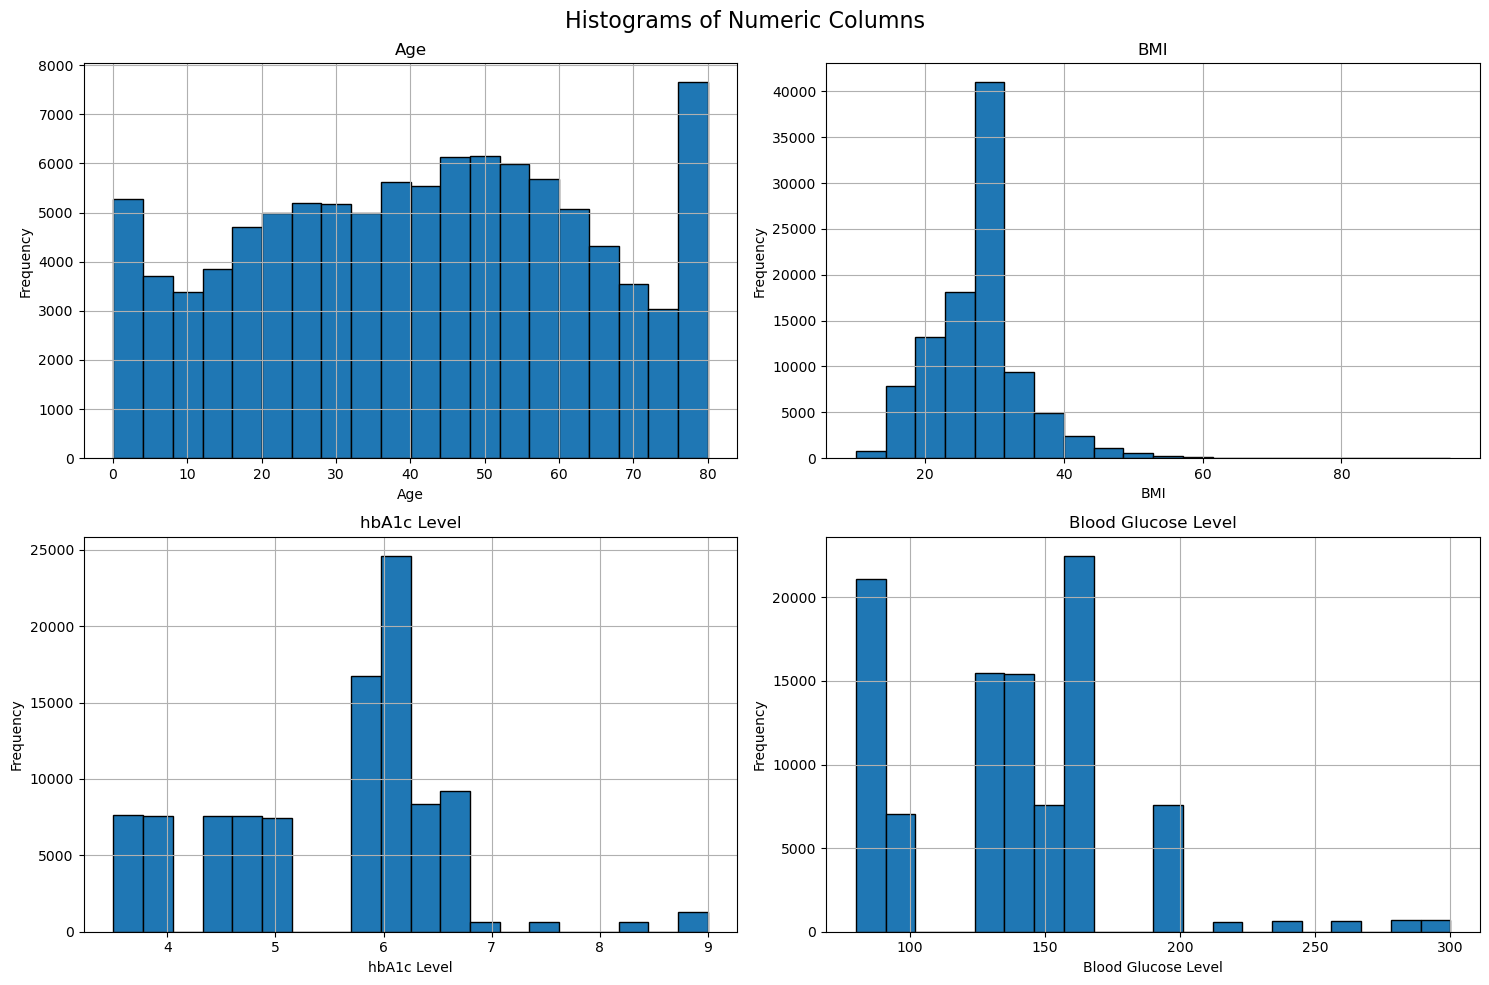

In [25]:
# Visualize other numeric columns

# List of columns to visualize
columns_to_visualize = ['Age', 'BMI', 'HbA1c Level', 'Blood Glucose Level']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Histograms of Numeric Columns', fontsize=16)

axes = axes.flatten()

# Create histograms for each specified column
for i, column in enumerate(columns_to_visualize):
    df[column].hist(ax=axes[i], bins=20, edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

Age - probably fine as is, maybe binning
BMI - skewed, long tail. investigate outliers, maybe log transform, scale, or binning also
HbA1c - investigate outliers, bin based on clinical categories?
blood glucose - clinical categories/thresholds?

                     Diabetes       Age       BMI  hbA1c Level  \
Diabetes             1.000000  0.258008  0.214357     0.400660   
Age                  0.258008  1.000000  0.337396     0.101354   
BMI                  0.214357  0.337396  1.000000     0.082997   
hbA1c Level          0.400660  0.101354  0.082997     1.000000   
Blood Glucose Level  0.419558  0.110672  0.091261     0.166733   

                     Blood Glucose Level  
Diabetes                        0.419558  
Age                             0.110672  
BMI                             0.091261  
hbA1c Level                     0.166733  
Blood Glucose Level             1.000000  


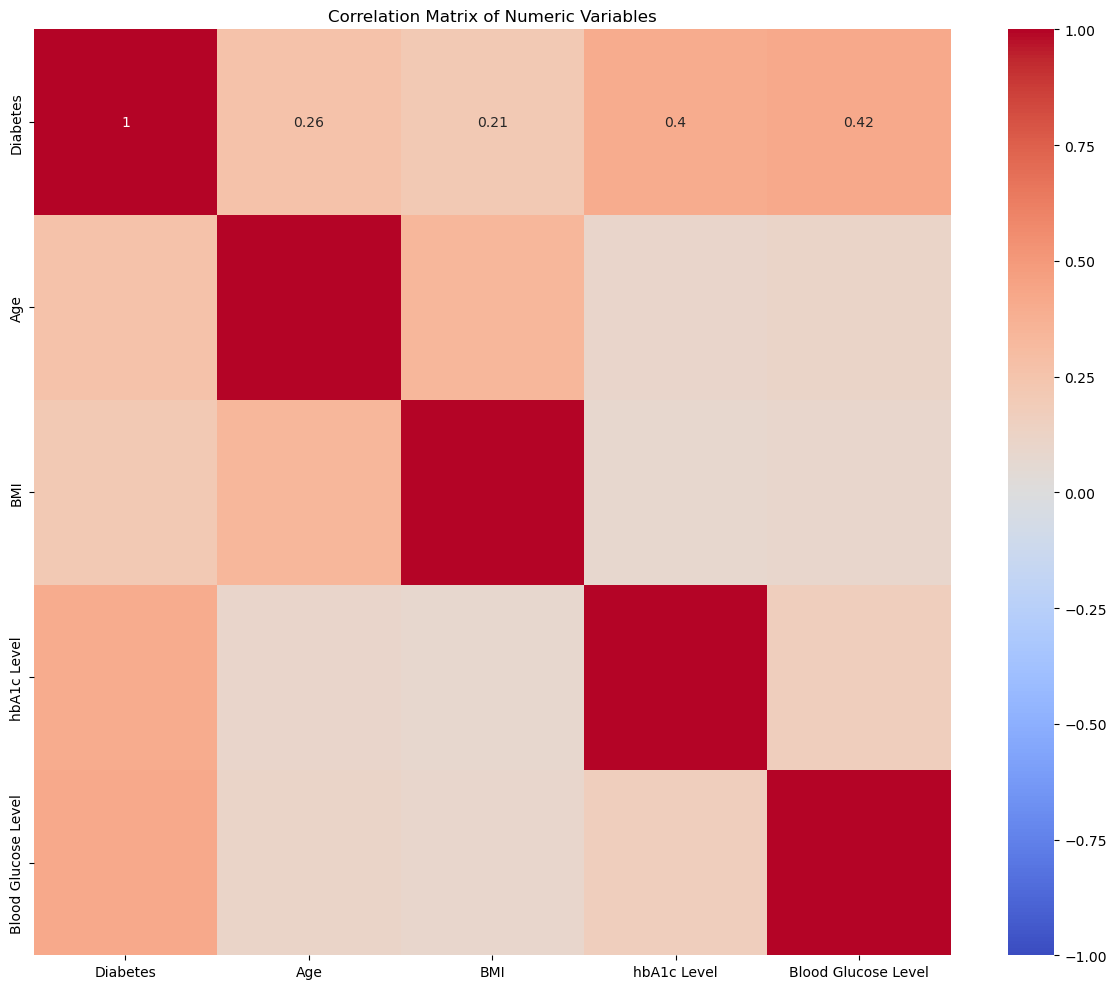

In [52]:
# Create a Correlation matrix to examine numeric columns relationship with target

# Select numeric columns
numeric_columns = ['Diabetes','Age', 'BMI', 'hbA1c Level', 'Blood Glucose Level']
numeric_df = df[numeric_columns]

correlation_matrix = numeric_df.corr()

# Print the correlation matrix
print(correlation_matrix)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmax=1, vmin=-1, center=0)
plt.title('Correlation Matrix of Numeric Variables')
plt.tight_layout()
plt.show()



For an HbA1c test to classify as normal, or in the non-diabetic range, the value must be below 5.7 %. Anyone with an HbA1c value of 5.7 % to 6.4 % is considered to be prediabetic, while diabetes can be diagnosed with a HbA1c of 6.5% or higher.

In [41]:
df.describe()

,Year,Age,Race : African American,Race : Asian,Race : Caucasian,Race : Hispanic,Race : Other,Hypertension,Heart Disease,BMI,hbA1c Level,Blood Glucose Level,Diabetes
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,2018.360820,41.885856,0.202230,0.200150,0.198760,0.19888,0.199980,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,1.345239,22.516840,0.401665,0.400114,0.399069,0.39916,0.399987,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,2015.000000,0.080000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,2019.000000,24.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,2019.000000,43.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,2019.000000,60.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,2022.000000,80.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [42]:
df['Age'].value_counts()

Age
80.00    5621
51.00    1619
47.00    1574
48.00    1568
53.00    1542
         ... 
0.48       83
1.00       83
0.40       66
0.16       59
0.08       36
Name: count, Length: 102, dtype: int64

- This dataset seems to have capped the Age at 80 and everyone 80 or above is binned together

Next Steps To Consider :

Relationship Plots:
    age vs bmi
    hba1c vs blood glucose
    bmi by gender or diabetes status

create new columns:
    bmi categories
    combined risk factors
    apply groupby

- Once the cleaning and exploration is complete, we can save the dataframe to load into a new jupyter notebook 
- We can use the new notebook for model testing only

In [ ]:
# Assuming your cleaned DataFrame is called 'df'
df.to_csv('cleaned_patient_data.csv', index=False)
print("DataFrame saved successfully.")